# DATA 602 Final Project
##### *Kristin Lussi*
##### *May 12th, 2024*



## Abstract

The aim of this study was to identify the primary predictors influencing male fertility diagnosis. Analysis of the dataset revealed an imbalance, with a higher frequency of "normal" diagnoses than "altered" ones, posing a challenge for developing an effective logistic regression model for both classes (class 0 and class 1). To address this imbalace, SMOTE (Synthetic Minority Over-Sampling Technique) was implemented. This technique resulted in an improved F1 score for both classes, yielding a final model with an overall accuracy of 63%.


Once the logistic regression model was created and assessed, coefficients were extracted to determine the most significant predictors. The analysis identified age, recent fevers (less than 3 months ag), alcohol consumption (once a week and several times a week), and the fall and spring seasons as the most influential variables in predicting fertility diagnosis.

In summary, this study underscores the importance of addressing data imbalance and utilizing advanced techniques like SMOTE to enhance model performance. The identified predictors offer valuable information for understanding and potentially mitigating fertility issues, contributing to advancements in the field of reproductive health.


## Introduction

In this study, we are using a dataset called "Fertility Data Set" from Kaggle. 100 volunteers provided a semen sample analyzed according to WHO 2010 criteria. The dataset includes variables such as season, age, childhood diseases, accidents or serious trauma, surgical interventions, high fevers in the last year, frequency of alcohol consumption, smoking habit, and number of hours spent sitting per day. The target variable is diagnosis. Implementing a logistic regression model, we aim to discern the significant variables driving fertility diagnosis prediction. Through this approach, we hope to shed light on the most significant determinants affecting fertility outcomes.




### Research Question

What are the primary factors that most significantly affect male fertility, considering factors such as season, age, childhood diseases, accidents or serious trauma, surgical interventions, high fevers in the last year, frequency of alcohol consumption, smoking habit, and number of hours spent sitting per day?

## Exploratory Data Analysis

In the following section, we will perform some exploratory data analysis to get a better understanding of the data.

In [62]:
import pandas as pd # import pandas
import numpy as np # import numpy
import matplotlib.pyplot as plt #import matplotlib
import seaborn as sns # import seaborn

url = "https://raw.githubusercontent.com/kristinlussi/DATA602/main/FinalProject/fertility.csv" # specify path

fertility_data = pd.read_csv(url) # read csv from url

#### Glimpse of Data

In [63]:
print(len(fertility_data)) # print the length of the data

100


In [64]:
print(fertility_data.columns) # print column names

Index(['Season', 'Age', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit',
       'Number of hours spent sitting per day', 'Diagnosis'],
      dtype='object')


In [65]:
print(fertility_data.dtypes) # print column data types

Season                                   object
Age                                       int64
Childish diseases                        object
Accident or serious trauma               object
Surgical intervention                    object
High fevers in the last year             object
Frequency of alcohol consumption         object
Smoking habit                            object
Number of hours spent sitting per day     int64
Diagnosis                                object
dtype: object


In [66]:
print(fertility_data.head()) # print glimpse of data

   Season  Age Childish diseases Accident or serious trauma  \
0  spring   30                no                        yes   
1  spring   35               yes                         no   
2  spring   27               yes                         no   
3  spring   32                no                        yes   
4  spring   30               yes                        yes   

  Surgical intervention High fevers in the last year  \
0                   yes       more than 3 months ago   
1                   yes       more than 3 months ago   
2                    no       more than 3 months ago   
3                   yes       more than 3 months ago   
4                    no       more than 3 months ago   

  Frequency of alcohol consumption Smoking habit  \
0                      once a week    occasional   
1                      once a week         daily   
2             hardly ever or never         never   
3             hardly ever or never         never   
4                      o

#### Missing Values

In [67]:
print(fertility_data.isna().sum()) # print sum of missing values

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64


#### Summary Statistics

In [68]:
summary_statistics = fertility_data.describe() # get summary statistics of the data (numerical)
print(summary_statistics) # print summary statistics

              Age  Number of hours spent sitting per day
count  100.000000                             100.000000
mean    30.110000                              10.800000
std      2.246861                              33.616975
min     27.000000                               1.000000
25%     28.000000                               5.000000
50%     30.000000                               7.000000
75%     32.000000                               9.000000
max     36.000000                             342.000000


#### Plots

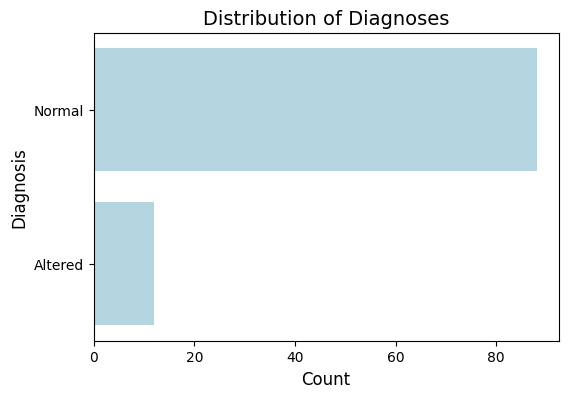

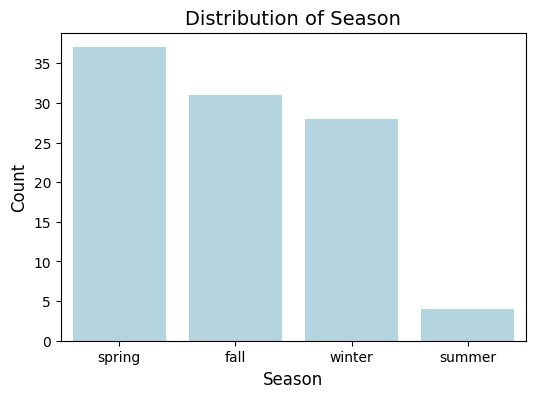

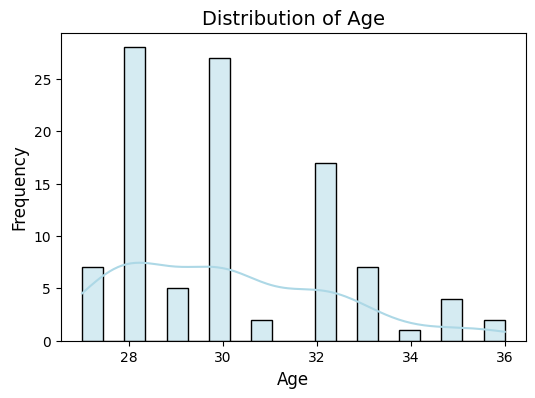

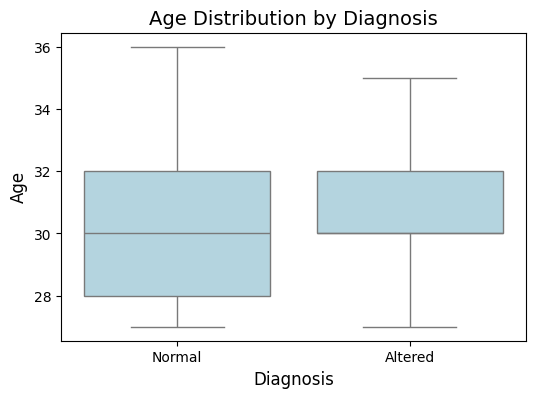

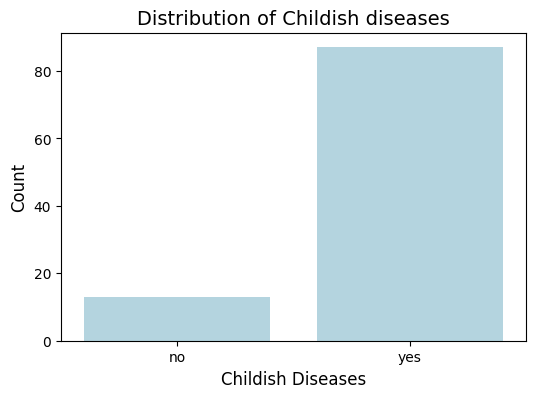

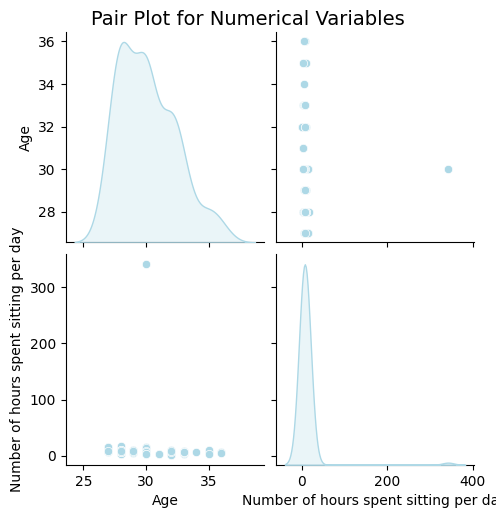

In [69]:
# Count plot for Diagnoses
plt.figure(figsize=(6,4)) # set figure size
sns.countplot(fertility_data['Diagnosis'], color = 'lightblue') # create a count plot of the diagnoses and change the color to hot pink
plt.title("Distribution of Diagnoses", fontsize=14) # add plot title, change the font size to 14
plt.xlabel("Count", fontsize = 12) # change x-label to Count and change font size
plt.ylabel("Diagnosis", fontsize = 12) # change y-label to Diagnosis and change font size
plt.show() # show plot

# Count plot for Season
plt.figure(figsize=(6, 4)) # set figure size
sns.countplot(x="Season", data=fertility_data, color = 'lightblue') # create a count plot of the seasons and change the color to hot pink
plt.title("Distribution of Season", fontsize = 14)  # add plot title, change the font size to 14
plt.xlabel("Season", fontsize=12) # change x-label to Season and change the font size
plt.ylabel("Count", fontsize=12) # change y-label to Count and change the font size
plt.show() # show plot

# Histogram for Age
plt.figure(figsize=(6, 4)) # set figure size
sns.histplot(fertility_data["Age"], bins=20, kde=True, color = 'lightblue') #create a histogram for age and change color to hot pink
plt.title("Distribution of Age", fontsize=14) # add plot title, change the font size to 14
plt.xlabel("Age", fontsize=12) # change x-label to Age and change the font size
plt.ylabel("Frequency", fontsize=12) # change y-label to Frequency and change the font size
plt.show() # show plot

# Box plot for Age by Diagnosis
plt.figure(figsize=(6, 4)) # set figure size
sns.boxplot(x="Diagnosis", y="Age", data=fertility_data, color='lightblue') # create a box plot for age and change the color to hot pink
plt.title("Age Distribution by Diagnosis", fontsize=14) # add plot title, change the font size to 14
plt.xlabel("Diagnosis", fontsize=12) # change x-label to Diagnosis and change the font size
plt.ylabel("Age", fontsize=12) # change y-label to Age and change the font size
plt.show() # show plot

# Bar plot for Childish diseases
plt.figure(figsize=(6, 4)) # set figure size
sns.countplot(x="Childish diseases", data=fertility_data, color='lightblue') # create a count plot for childish diseases and change color to hot pink
plt.title("Distribution of Childish diseases", fontsize=14) # add plot title, change the font size to 14
plt.xlabel("Childish Diseases",fontsize=12) # change x-label to Childish Diseases and set font size to 12
plt.ylabel("Count",fontsize=12) # change y-label to Count and set font size to 12
plt.show() # show plot

# Pairplot for numerical variables
pair_plot = sns.pairplot(fertility_data, diag_kind='kde', diag_kws = {'color':'lightblue'}, plot_kws={'color': 'lightblue'}) # create a pair plot for the numerical data and change color to hot pink
pair_plot.fig.suptitle("Pair Plot for Numerical Variables", y=1.02, fontsize=14) # add plot title, change the font size to 14
plt.show() # show plot

## Data Wrangling

#### Change Column Names

In [70]:
fertility_data = fertility_data.rename(columns={'Childish diseases' : 'ChildDisease', 'Accident or serious trauma':'Accident',
                                                'Surgical intervention':'Surgery', 'Smoking habit':'Smoking',
                                                'Frequency of alcohol consumption':'Alcohol', 'High fevers in the last year':'Fevers',
                                                'Number of hours spent sitting per day':'SittingHours'})

#### Dummy Variables

In [71]:
# define a function to convert 'yes' to 1 and other values to 0
def convert_to_binary(value):
    return 1 if value == 'yes' else 0

# apply the function to specific columns using applymap
columns_to_convert = ['ChildDisease', 'Accident', 'Surgery']
fertility_data[columns_to_convert]=fertility_data[columns_to_convert].applymap(lambda x: convert_to_binary(x))

# change Diagnosis column values to be "0" when "Normal" and "1" when "Altered"
fertility_data['Diagnosis'] = np.where(fertility_data['Diagnosis']=="Normal", "0", "1")

# get dummy variables for high fevers column
fertility_data = pd.get_dummies(fertility_data, columns=['Fevers'])

# get dummy variables for smoking column
fertility_data = pd.get_dummies(fertility_data, columns = ['Smoking'])

# get dummy variables for alcohol consumption column
fertility_data = pd.get_dummies(fertility_data, columns=['Alcohol'])

# get dummy variables for season column
fertility_data = pd.get_dummies(fertility_data, columns=['Season'])

# Convert True to 1 and False to 0 for all columns
fertility_data = fertility_data.astype(int)

print(fertility_data.head())

   Age  ChildDisease  Accident  Surgery  SittingHours  Diagnosis  \
0   30             0         1        1            16          0   
1   35             1         0        1             6          1   
2   27             1         0        0             9          0   
3   32             0         1        1             7          0   
4   30             1         1        0             9          1   

   Fevers_less than 3 months ago  Fevers_more than 3 months ago  Fevers_no  \
0                              0                              1          0   
1                              0                              1          0   
2                              0                              1          0   
3                              0                              1          0   
4                              0                              1          0   

   Smoking_daily  ...  Smoking_occasional  Alcohol_every day  \
0              0  ...                   1                 

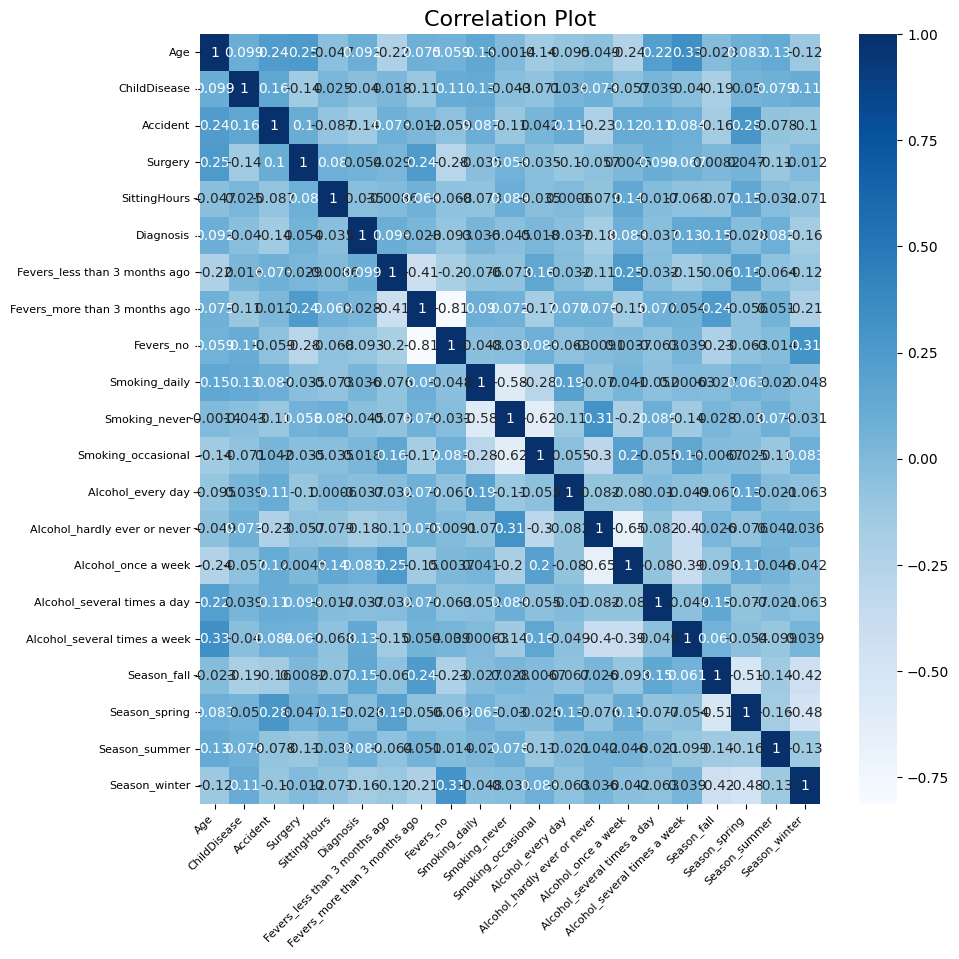

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(fertility_data.corr(),cbar=True,annot=True,cmap='Blues')
plt.title("Correlation Plot", fontsize = 16)
plt.xticks(rotation = 45, fontsize = 8, ha='right')
plt.yticks(fontsize=8, ha='right')
plt.show() # show plot

## Data Analysis

We will perform Logistic Regression on the data because the target variable (Diagnosis) is categorical (Altered or Normal). We will then determine which variables are the most significant in predicting the target variable (Diagnosis).


#### Import Libraries

In [73]:
# ml
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

#### Create Logistic Regression Model

In [74]:
# X contains predictor variables and y contains the target variable (diagnosis)
X = fertility_data[['Age', 'ChildDisease', 'Accident', 'Surgery', 'Fevers_less than 3 months ago','Fevers_more than 3 months ago', 'Alcohol_every day', 'Alcohol_hardly ever or never',
'Alcohol_once a week', 'Alcohol_several times a day', 'Alcohol_several times a week',
'Smoking_never', 'Smoking_occasional', 'Smoking_daily', 'SittingHours', 'Season_fall',
'Season_spring', 'Season_summer', 'Season_winter']]
y = fertility_data['Diagnosis']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1999)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train_scaled, y_train)
# Make predictions on the testing set
y_pred = logreg.predict(X_test_scaled)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

[[24  2]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.00      0.00      0.00         4

    accuracy                           0.80        30
   macro avg       0.43      0.46      0.44        30
weighted avg       0.74      0.80      0.77        30



The confusion matrix tells us that 24 instances were correctly classified as positive (TP), 4 instances were incorrectly classified as negative (FN), 0 instances were correctly classified as negative (TN), and 2 instances were incorrectly classified as positive (FP)
From the classification report, we can see that the accuracy of the model is 80%, which means 80% of the instances in the test set were correctly classified. The f1 score for class 0 is 89%, but the f1 score for class 1 is 0%, which indicates poor model performance. Although the accuracy of the model is high, its inability to correctly classify class 1 instances significantly impacts the model’s performance.

The previous model was unable to predict the class 1 instances. This is likely due to a significant class imbalance (the minority class has significantly fewer instances than the other class).

We will improve the model by implementing SMOTE (Synthetic Minority Over-Sampling Technique). This helps mitigate the effects of class imbalance and improves the model’s ability to generalize the minority class.

In [75]:
# X contains predictor variables and y contains the target variable (diagnosis)
X = fertility_data[['Age', 'ChildDisease', 'Accident', 'Surgery', 'Fevers_less than 3 months ago',
                    'Fevers_more than 3 months ago', 'Alcohol_every day', 'Alcohol_hardly ever or never',
                    'Alcohol_once a week', 'Alcohol_several times a day', 'Alcohol_several times a week',
                    'Smoking_never', 'Smoking_occasional', 'Smoking_daily', 'SittingHours', 'Season_fall',
                    'Season_spring', 'Season_summer', 'Season_winter']]
y = fertility_data['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1999)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))

[[16 10]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.23      0.75      0.35         4

    accuracy                           0.63        30
   macro avg       0.59      0.68      0.55        30
weighted avg       0.85      0.63      0.69        30



The confusion matrix tells us that 16 instances were correctly classified as positive (TP), 1 instance was incorrectly classified as negative (FN), 3 instances were correctly classified as negative (TN), and 10 instances were incorrectly classified as positive (FP).
From the classification report, we can see that the accuracy of the model is 63%, which means 63% of the instances in the test set were correctly classified. The f1 score for class 0 is 74% and the f1 score for class 1 is 35%. Although the overall accuracy for the model has decreased, this model does a better job at predicting the class 1 instances.


#### Calculate the ROC Curve

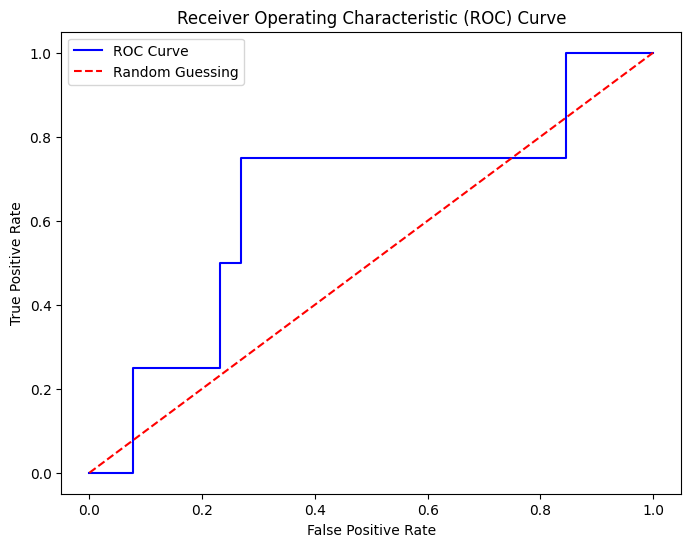

In [76]:
# Calculate the probabilities of class 1 (positive class)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Step-like pattern indicates that the data size is relatively small and the dataset may be imbalanced (i.e. the diagnosis of “normal” is much more frequent than “altered”). For the most part, the ROC curve (blue line) is above the random red dotted line. This indicates that the model is better at distinguishing between classes than random chance.
In conclusion, the models predictions are more informative than simply guessing.


#### Extract Coefficients from Logistic Regression Model

In [77]:
# Extract coefficients
coefficients = logreg.coef_[0]
variable_names = X.columns

# Display coefficients
for name, coef in zip(variable_names, coefficients):
    print(f"{name}: {coef}")

Age: 0.8593387025690044
ChildDisease: -0.2416495513077079
Accident: -0.9540365166546538
Surgery: -0.5622197547636155
Fevers_less than 3 months ago: 0.846328088974543
Fevers_more than 3 months ago: -0.0003131228585261174
Alcohol_every day: -0.22539237761243866
Alcohol_hardly ever or never: -0.6286699112953426
Alcohol_once a week: 0.4989888165900425
Alcohol_several times a day: -0.3624670359367369
Alcohol_several times a week: 0.3645781921381133
Smoking_never: 0.19206472975978753
Smoking_occasional: -0.28110250302652035
Smoking_daily: 0.06284064615611824
SittingHours: -0.4978720233720379
Season_fall: 0.27990633159272577
Season_spring: 0.4268173623383458
Season_summer: -0.6047783198609007
Season_winter: -0.44907137638158123


Positive coefficients indicate that as the corresponding predictor variable increases, the long-odds of the target variable (Diagnosis) also increase.
According to these coefficients, the most significant predictor variables are:
- Age
- Fevers (less than 3 months ago)
- Alcohol (Once a week)
- Alcohol (Several times a week)
- Season (Fall)
- Season (Spring)


## Conclusion

The aim of this study was to identify the key predictors influencing fertility diagnosis. Our analysis revealed an imbalance in the dataset, with a higher proportion of "normal" diagnoses compared to "altered" ones. This posed a challenge in developing a logistic regression model that effectively predicted both classes (class 0 and class 1). To address this imbalance, we implemented SMOTE (Synthetic Minority Over-Sampling Technique) after researching methods to enhance model performance. This approach led to improvements in the F1 scores for both classes. The final model had an overall accuracy of 63%.

Lastly, we extracted the coefficients from the logistic regression model to determine which variables were the most significant predictors. We found that age, fevers (less than 3 months ago), alcohol consumption (once a week and several times a week), and the fall and spring seasons were the most significant variables predicting fertility diagnosis.

### Future Recommendations
This study encountered several limitations due to the relatively small size of the dataset. Notably, there was an imbalance between the number of “Normal” and “Altered” diagnoses, which could have influenced the model’s performance. While implementing SMOTE helped mitigate this imbalance, utilizing a dataset with a greater number of cases could lead to more accurate model outcomes.

Additionally, using a larger dataset would provide a more comprehensive representation of the underlying population, allowing for deeper exploration of the factors influencing fertility diagnosis.

A valuable addition to the data collection process would involve testing study participants across different seasons of the year. The existing dataset examined 100 participants' semen samples across various seasons. Conducting a time-series analysis on individual participants could offer insights into how seasonal variations impact fertility diagnosis. This approach would enhance our understanding of the temporal dynamics of fertility and provide valuable information for future research in this area.



## Sources

GabbyGab. "Fertility Data Set." Kaggle, Kaggle, URL: https://www.kaggle.com/datasets/gabbygab/fertility-data-set.

DataCamp. “Supervised Learning with scikit-learn.” DataCamp, DataCamp, URL:
https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn
